Explore the Example Data

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-06-05 14:50:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  80.2MB/s    in 0.8s    

2020-06-05 14:50:36 (80.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Let's define each of these directories:

In [0]:
base_dir='/tmp/cats_and_dogs_filtered'

train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

# Directory with our training cat/dog pictures
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

Now, let's see what the filenames look like in the cats and dogs train directories

In [4]:
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.209.jpg', 'cat.821.jpg', 'cat.881.jpg', 'cat.842.jpg', 'cat.31.jpg', 'cat.734.jpg', 'cat.584.jpg', 'cat.380.jpg', 'cat.776.jpg', 'cat.715.jpg']
['dog.112.jpg', 'dog.454.jpg', 'dog.837.jpg', 'dog.655.jpg', 'dog.45.jpg', 'dog.940.jpg', 'dog.772.jpg', 'dog.605.jpg', 'dog.763.jpg', 'dog.484.jpg']


Let's find out the total number of cat and dog images in the train and validation directories:

In [5]:
print('Total training cat images :',len(os.listdir(train_cats_dir)))
print('Total training dogs images:',len(os.listdir(train_dogs_dir)))

print('Total validation cat images :',len(os.listdir(validation_cats_dir)))
print('Total validation dogs images :',len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dogs images: 1000
Total validation cat images : 500
Total validation dogs images : 500


Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

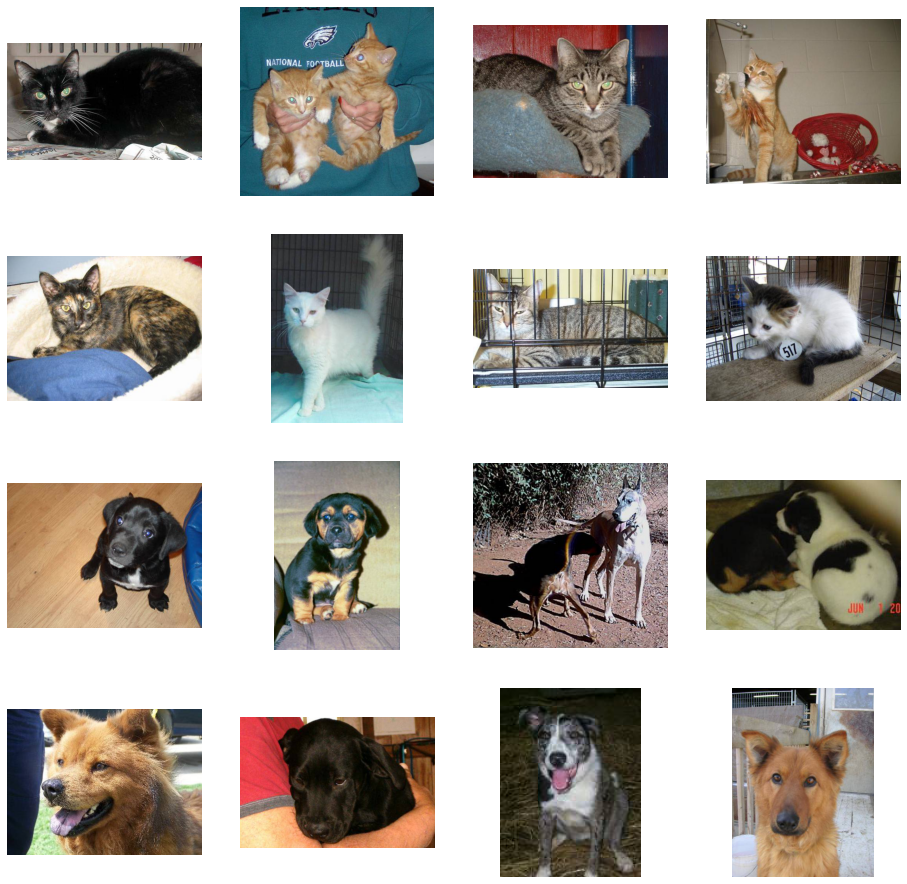

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Building a Small Model from Scratch 

In [0]:
import tensorflow as tf


In [0]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
               loss='binary_crossentropy',
              metrics=['accuracy'])

Data Preprocessing

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_datagen=ImageDataGenerator(rescale=1.0/255.0)
test_datagen=ImageDataGenerator(rescale=1.0/255.0)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  target_size=(150,150),
                                                  class_mode  = 'binary',)

validation_generator=test_datagen.flow_from_directory(validation_dir,
                                  batch_size=20,
                                  target_size=(150,150),
                                  class_mode  = 'binary',)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Training

In [25]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 58s - loss: 1.1485 - accuracy: 0.5590 - val_loss: 0.6769 - val_accuracy: 0.5340
Epoch 2/15
100/100 - 57s - loss: 0.6680 - accuracy: 0.6470 - val_loss: 0.6473 - val_accuracy: 0.6400
Epoch 3/15
100/100 - 57s - loss: 0.5777 - accuracy: 0.7030 - val_loss: 0.6214 - val_accuracy: 0.6840
Epoch 4/15
100/100 - 58s - loss: 0.5165 - accuracy: 0.7655 - val_loss: 0.5835 - val_accuracy: 0.7260
Epoch 5/15
100/100 - 58s - loss: 0.4094 - accuracy: 0.8185 - val_loss: 0.6381 - val_accuracy: 0.7010
Epoch 6/15
100/100 - 58s - loss: 0.3301 - accuracy: 0.8545 - val_loss: 0.7257 - val_accuracy: 0.7090
Epoch 7/15
100/100 - 58s - loss: 0.2332 - accuracy: 0.9105 - val_loss: 0.8038 - val_accuracy: 0.6940
Epoch 8/15
100/100 - 57s - loss: 0.1494 - accuracy: 0.9475 - val_loss: 0.8358 - val_accuracy: 0.7190
Epoch 9/15
100/100 - 57s - loss: 0.1117 - accuracy: 0.9660 - val_loss: 1.3002 - val_accuracy: 0.7040
Epoch 10/15
100/100 - 57s - loss: 0.0859 - accuracy: 0.9780 - val_loss: 1.4751 - val_accura

Evaluating Accuracy and Loss for the Model

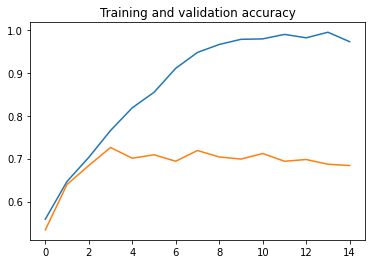

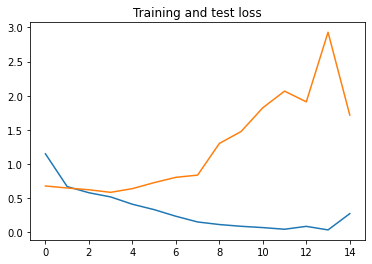

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

#Get the number of epoch
epochs=range(len(acc))

#Plot the training and test accuracy per epochs
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('Training and validation accuracy')
plt.show()

#Plot the training and test loss per epochs
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('Training and test loss')
plt.show()

Clean Up

In [0]:
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )